# Credit Risk Analysis

# Model building

### Import packages and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#### Read the csv file

In [2]:
df_model = pd.read_csv('df_model.csv', sep='t')
df_model

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,income_group_100000-,loan_percent_income_group_0-10%,loan_percent_income_group_10-20%,loan_percent_income_group_20-30%,loan_percent_income_group_30-40%,loan_percent_income_group_40-50%,loan_percent_income_group_50-60%,loan_percent_income_group_60-70%,loan_percent_income_group_70-80%,loan_percent_income_group_80%-
0,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,1,0,0,0,0,0,0,0,0
1,25,9600,1.0,5500,12.87,1,0.57,0,3,1,...,0,0,0,0,0,0,1,0,0,0
2,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,0,0,0,0,0,0,1,0,0,0
3,24,54400,8.0,35000,14.27,1,0.55,1,4,0,...,0,0,0,0,0,0,1,0,0,0
4,21,9900,2.0,2500,7.14,1,0.25,0,2,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28624,57,53000,1.0,5800,13.16,0,0.11,0,30,1,...,0,0,1,0,0,0,0,0,0,0
28625,54,120000,4.0,17625,7.49,0,0.15,0,19,1,...,1,0,1,0,0,0,0,0,0,0
28626,65,76000,3.0,35000,10.99,1,0.46,0,28,0,...,0,0,0,0,0,1,0,0,0,0
28627,56,150000,5.0,15000,11.48,0,0.10,0,26,1,...,1,1,0,0,0,0,0,0,0,0


In [3]:
#### Creat x and y datasets

X = df_model.drop(['loan_status'], axis=1)
y = df_model['loan_status']

In [4]:
#### Import models and metrics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_fscore_support, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier

#### Split the x,y dataset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Define the hyperparameters of  the models

logistic = LogisticRegression(solver='lbfgs')
forest = RandomForestClassifier(n_estimators=200,min_samples_split = 8, random_state=42)
gboost = GradientBoostingClassifier(n_estimators=200,min_samples_split = 8, random_state=42)
xgboost = XGBClassifier(learning_rate = 0.2, max_depth=4)

#### Fit the models on the train datasets, after that get the prediction values with predict_proba.

logistic.fit(X_train, y_train)
forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

logistic_preds = logistic.predict_proba(X_test)
forest_preds = forest.predict_proba(X_test)
xgboost_preds = xgboost.predict_proba(X_test)

#### I used predict_porba because I want the probability of default values. With these values I can find the "optimal threshold".
#### "Optimal threshold": The threshold value where the accuracy score,  the default and nondefault recalls are  maximalized. (Where the three value almost the same.)

### Define two function.
#### roc_auc_plot:
- This function plots the ROC_AUC curves and parameter importance of the models. Furthermore shows the confusion matrices and classification reports of the models.

#### accept_rate:
- This function includes a for loop which changes the acceptance rate between 5% to 100%, the threshold changes as well.  
- At each threshold value the funcion calculates the percentiges of the default and nondefault recalls, bad rates and models scores. 
- After that the function plots these values. The plots shows the value of the "optimal threshold" for each model.
- Furthermore, the function calculates and plots the expacted losses at each threshold value for every model.
- Expected Loss = PD * LGD * loan amount (For the calculations I assumed a 20% Loss Given Default value (LGD = 0.2))

In [5]:
def roc_auc_plot():
    lr_fallout, lr_sensitivity, lr_thresholds = roc_curve(y_test, logistic_preds_df.lr_prob_default)
    logistic_auc = roc_auc_score(y_test, logistic_preds_df.lr_prob_default)
    forest_fallout, forest_sensitivity, forest_thresholds = roc_curve(y_test, forest_preds_df.forest_prob_default)
    forest_auc = roc_auc_score(y_test, forest_preds_df.forest_prob_default)
    xgb_fallout, xgb_sensitivity, xgb_thresholds = roc_curve(y_test, xgboost_preds_df.xgb_prob_default)
    xgboost_auc = roc_auc_score(y_test, xgboost_preds_df.xgb_prob_default)

    target_names = ['Non Default','Default']

    print(classification_report(y_test, logistic_preds_df['lr_pred_status'],target_names=target_names))
    print(confusion_matrix(y_test, logistic_preds_df['lr_pred_status']))

    print(classification_report(y_test, forest_preds_df['forest_pred_status'],target_names=target_names))
    print(confusion_matrix(y_test, forest_preds_df['forest_pred_status']))

    print(classification_report(y_test, xgboost_preds_df['xgb_pred_status'], target_names=target_names))
    print(confusion_matrix(y_test, xgboost_preds_df['xgb_pred_status']))

    plt.plot(lr_fallout, lr_sensitivity, label='LR ROC Curve (AUC: {})'.format(round(logistic_auc,2)))
    plt.plot(forest_fallout, forest_sensitivity, label='Forest ROC Curve (AUC: {})'.format(round(forest_auc,2)))
    plt.plot(xgb_fallout, xgb_sensitivity, label='XGB ROC Curve (AUC: {})'.format(round(xgboost_auc,2)))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC chart - Probability of default')
    plt.legend(loc='lower right')
    #plt.text(0.75,0.1,'AUC score: {}'.format(round(gboost_auc,2)), bbox={'facecolor': 'white', 'alpha': 0.3, 'pad': 10})
    plt.show()
    xgb.plot_importance(xgboost, importance_type = 'weight')
    logistic_params_coef = pd.DataFrame()
    logistic_params_coef['Feature Name'] = list(logistic.feature_names_in_.transpose())
    logistic_params_coef['Abs Coefficient'] = abs(logistic.coef_.transpose())
    logistic_params_coef.set_index('Feature Name').sort_values(by='Abs Coefficient',ascending=False).head().plot.barh()
    
    forest_params_coef = pd.DataFrame()
    forest_params_coef['Feature Name'] = list(forest.feature_names_in_.transpose())
    forest_params_coef['Abs Feature importance'] = abs(forest.feature_importances_.transpose())
    forest_params_coef.set_index('Feature Name').sort_values(by='Abs Feature importance',ascending=False).head().plot.barh()

def accept_rate():

    accept_rates = np.arange(0.05,0.96,0.01)
    logistic_losses = []
    forest_losses = []
    xgb_losses = []

    logistic_value = []
    forest_value = []
    xgb_value = []

    logistic_bad_rates = []
    forest_bad_rates = []
    xgb_bad_rates = []

    logistic_thresholds = []
    forest_thresholds = []
    xgb_thresholds = []

    logistic_default_recall = []
    forest_default_recall = []
    xgboost_default_recall = []

    logistic_nondefault_recall = []
    forest_nondefault_recall = []
    xgboost_nondefault_recall = []

    logistic_scores = []
    forest_scores = []
    xgb_scores =  []

    for rate in accept_rates:
        logistic_preds_df = pd.concat([pd.DataFrame(y_test.reset_index(drop=True), columns=['loan_status']),X_test['loan_amnt'].reset_index(drop=True),
                                       pd.DataFrame(logistic_preds[:,1], columns = ['lr_prob_default'])],axis=1)
        logistic_preds_df['LGD'] = 0.2
        threshold = round(np.quantile(logistic_preds_df['lr_prob_default'],rate),3)
        logistic_thresholds.append(threshold)
        logistic_preds_df['lr_pred_status'] = logistic_preds_df.lr_prob_default.apply(lambda x: 1 if x > threshold else 0)
        logistic_default_recall.append(precision_recall_fscore_support(y_test, logistic_preds_df['lr_pred_status'])[1][1])
        logistic_nondefault_recall.append(precision_recall_fscore_support(y_test, logistic_preds_df['lr_pred_status'])[1][0])
        logistic_scores.append(accuracy_score(y_test,logistic_preds_df.lr_pred_status))
        logistic_preds_df = logistic_preds_df[logistic_preds_df['lr_pred_status'] == 0]
        logistic_bad_rates.append(np.sum(logistic_preds_df['loan_status'])/logistic_preds_df['loan_status'].count())

        forest_preds_df = pd.concat([pd.DataFrame(y_test.reset_index(drop=True), columns=['loan_status']),X_test['loan_amnt'].reset_index(drop=True),
                                       pd.DataFrame(forest_preds[:,1], columns = ['forest_prob_default'])],axis=1)
        forest_preds_df['LGD'] = 0.2
        threshold = round(np.quantile(forest_preds_df['forest_prob_default'],rate),3)
        forest_thresholds.append(threshold)
        forest_preds_df['forest_pred_status'] = forest_preds_df.forest_prob_default.apply(lambda x: 1 if x > threshold else 0)
        forest_default_recall.append(precision_recall_fscore_support(y_test, forest_preds_df['forest_pred_status'])[1][1])
        forest_nondefault_recall.append(precision_recall_fscore_support(y_test, forest_preds_df['forest_pred_status'])[1][0])
        forest_scores.append(accuracy_score(y_test,forest_preds_df.forest_pred_status))
        forest_preds_df = forest_preds_df[forest_preds_df['forest_pred_status']==0]
        forest_bad_rates.append(np.sum(forest_preds_df['loan_status'])/forest_preds_df['loan_status'].count())

        xgboost_preds_df = pd.concat([pd.DataFrame(y_test.reset_index(drop=True), columns=['loan_status']),X_test['loan_amnt'].reset_index(drop=True),
                                       pd.DataFrame(xgboost_preds[:,1], columns = ['xgb_prob_default'])],axis=1)
        xgboost_preds_df['LGD'] = 0.2
        threshold = round(np.quantile(xgboost_preds_df['xgb_prob_default'],rate),3)
        xgb_thresholds.append(threshold)
        xgboost_preds_df['xgb_pred_status'] = xgboost_preds_df.xgb_prob_default.apply(lambda x: 1 if x > threshold else 0)
        xgboost_default_recall.append(precision_recall_fscore_support(y_test, xgboost_preds_df['xgb_pred_status'])[1][1])
        xgboost_nondefault_recall.append(precision_recall_fscore_support(y_test, xgboost_preds_df['xgb_pred_status'])[1][0])
        xgb_scores.append(accuracy_score(y_test,xgboost_preds_df.xgb_pred_status))
        xgboost_preds_df = xgboost_preds_df[xgboost_preds_df['xgb_pred_status']==0]
        xgb_bad_rates.append(np.sum(xgboost_preds_df['loan_status'])/xgboost_preds_df['loan_status'].count())

        logistic_preds_df['logistic_expcted_loss'] = logistic_preds_df['lr_prob_default'] * logistic_preds_df['LGD'] * logistic_preds_df['loan_amnt']
        forest_preds_df['forest_expcted_loss'] = forest_preds_df['forest_prob_default'] * forest_preds_df['LGD'] * forest_preds_df['loan_amnt']
        xgboost_preds_df['xgboost_expcted_loss'] = xgboost_preds_df['xgb_prob_default'] * xgboost_preds_df['LGD'] * xgboost_preds_df['loan_amnt']

        logistic_losses.append(round(np.sum(logistic_preds_df['logistic_expcted_loss']),2))
        logistic_value.append(round(np.sum(logistic_preds_df['loan_amnt'])-np.sum(logistic_preds_df['logistic_expcted_loss']),2))
        forest_losses.append(round(np.sum(forest_preds_df['forest_expcted_loss']),2))
        forest_value.append(round(np.sum(forest_preds_df['loan_amnt'])-np.sum(forest_preds_df['forest_expcted_loss']),2))
        xgb_losses.append(round(np.sum(xgboost_preds_df['xgboost_expcted_loss']),2))
        xgb_value.append(round(np.sum(xgboost_preds_df['loan_amnt'])-np.sum(xgboost_preds_df['xgboost_expcted_loss']),2))
    
    lr = abs(np.array(logistic_default_recall) - np.array(logistic_nondefault_recall))
    f = abs(np.array(forest_default_recall) - np.array(forest_nondefault_recall))
    xgb = abs(np.array(xgboost_default_recall) - np.array(xgboost_nondefault_recall))

    plt.figure()
    plt.plot(logistic_thresholds,logistic_default_recall, label='LR default recall')
    plt.plot(logistic_thresholds,logistic_nondefault_recall, label='LR nondefault recall')
    plt.plot(logistic_thresholds,logistic_scores, label='LR accuracy scores')
    plt.plot(logistic_thresholds[np.argmin(lr)],logistic_default_recall[np.argmin(lr)],'ko')
    plt.annotate('Optimal threshold: {}'.format(logistic_thresholds[np.argmin(lr)]), xy=(logistic_thresholds[np.argmin(lr)]+0.03,logistic_default_recall[np.argmin(lr)]-0.01))
    plt.title('Logistic model metrics')
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(forest_thresholds,forest_default_recall, label='Forest default recall')
    plt.plot(forest_thresholds,forest_nondefault_recall, label='Forest nondefault recall')
    plt.plot(forest_thresholds,forest_scores, label='Forest accuracy scores')
    plt.plot(forest_thresholds[np.argmin(f)],forest_default_recall[np.argmin(f)],'ko')
    plt.annotate('Optimal threshold: {}'.format(forest_thresholds[np.argmin(f)]), xy=(forest_thresholds[np.argmin(f)]+0.03,forest_default_recall[np.argmin(f)]-0.01))
    plt.title('Forest model metrics')
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(xgb_thresholds,xgboost_default_recall, label='XGBoost default recall')
    plt.plot(xgb_thresholds,xgboost_nondefault_recall, label='XGBoost nondefault recall')
    plt.plot(xgb_thresholds,xgb_scores, label='XGBoost accuracy score')
    plt.plot(xgb_thresholds[np.argmin(xgb)],xgboost_default_recall[np.argmin(xgb)],'ko')
    plt.annotate('Optimal threshold: {}'.format(xgb_thresholds[np.argmin(xgb)]), xy=(xgb_thresholds[np.argmin(xgb)]+0.03,xgboost_default_recall[np.argmin(xgb)]-0.01))
    plt.title('XGBoost model metrics')
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(logistic_thresholds,logistic_losses, label='LR Expected Loss')
    plt.plot(forest_thresholds,forest_losses, label='Forest Expected Loss')
    plt.plot(xgb_thresholds,xgb_losses, label='XGBoost Expected Loss')
    plt.title('Expected Loss for each model')
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(logistic_thresholds,logistic_bad_rates, label='LR bad rates')
    plt.plot(forest_thresholds,forest_bad_rates, label='Forest bad rates')
    plt.plot(xgb_thresholds,xgb_bad_rates, label='XGBoost bad rates')
    plt.title('Bad rate for each model')
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(logistic_thresholds,logistic_value, label='LR Estimated Value')
    plt.plot(forest_thresholds,forest_value, label='Forest Estimated Value')
    plt.plot(xgb_thresholds,xgb_value, label='XGBoost Estimated Value')
    plt.title('Estimated Value for each model')
    plt.legend()
    plt.show()
    
    print('Logistic expected loss at the optimal threshold: {}'.format(logistic_losses[np.argmin(lr)]))
    print('Forest expected loss at the optimal threshold: {}'.format(forest_losses[np.argmin(f)]))
    print('XGBoost expected loss at the optimal threshold: {}'.format(xgb_losses[np.argmin(xgb)]))

    print('Logistic estimated value at the optimal threshold: {}'.format(logistic_value[np.argmin(lr)]))
    print('Forest estimated value at the optimal threshold: {}'.format(forest_value[np.argmin(f)]))
    print('XGBoost estimated value at the optimal threshold: {}'.format(xgb_value[np.argmin(xgb)]))

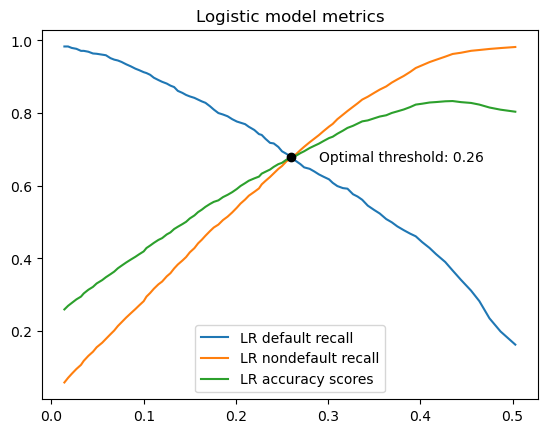

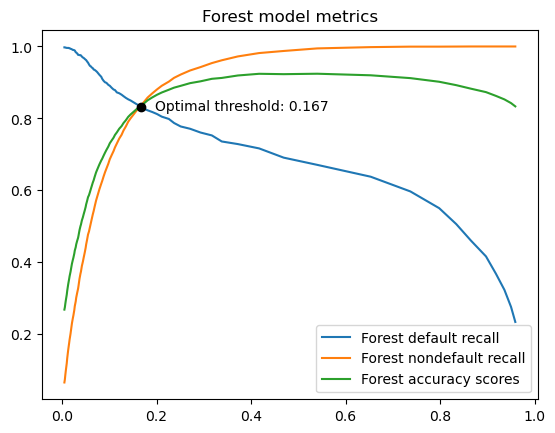

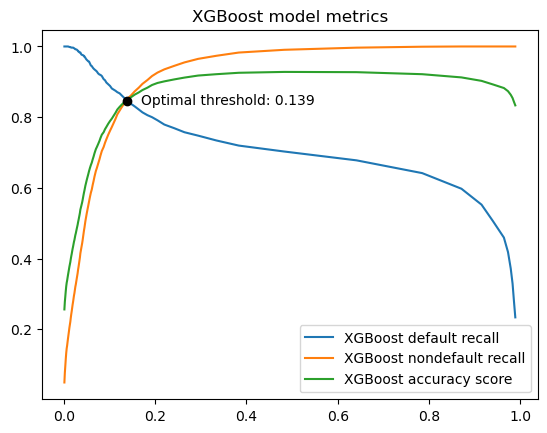

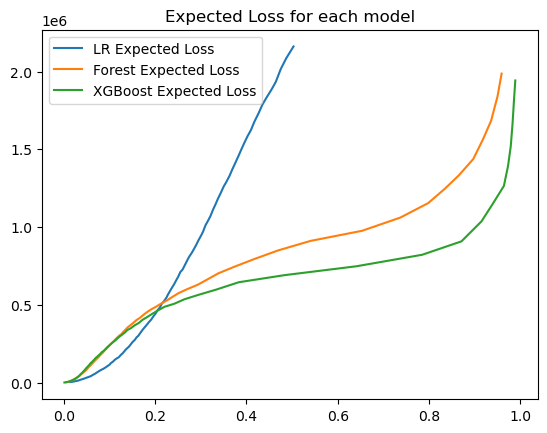

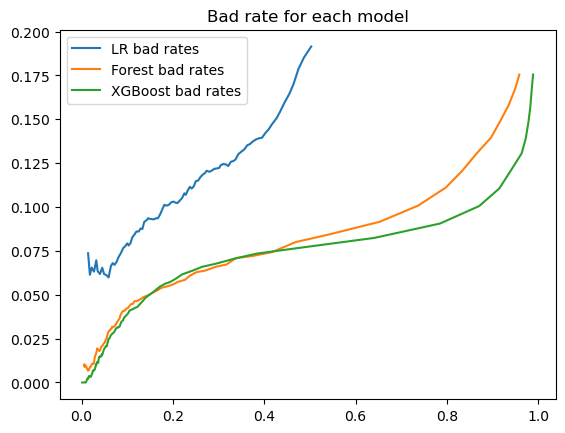

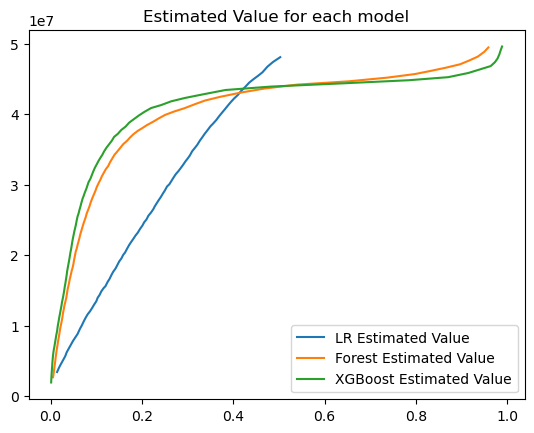

Logistic expected loss at the optimal threshold: 726627.04
Forest expected loss at the optimal threshold: 416903.96
XGBoost expected loss at the optimal threshold: 337630.86
Logistic estimated value at the optimal threshold: 30059322.96
Forest estimated value at the optimal threshold: 36208721.04
XGBoost estimated value at the optimal threshold: 36786869.14


In [6]:
accept_rate()

              precision    recall  f1-score   support

 Non Default       0.88      0.68      0.77      4481
     Default       0.37      0.68      0.48      1245

    accuracy                           0.68      5726
   macro avg       0.63      0.68      0.62      5726
weighted avg       0.77      0.68      0.70      5726

[[3026 1455]
 [ 401  844]]
              precision    recall  f1-score   support

 Non Default       0.95      0.84      0.89      4481
     Default       0.58      0.83      0.69      1245

    accuracy                           0.83      5726
   macro avg       0.77      0.83      0.79      5726
weighted avg       0.87      0.83      0.84      5726

[[3744  737]
 [ 208 1037]]
              precision    recall  f1-score   support

 Non Default       0.95      0.85      0.90      4481
     Default       0.61      0.84      0.71      1245

    accuracy                           0.85      5726
   macro avg       0.78      0.85      0.80      5726
weighted avg       0

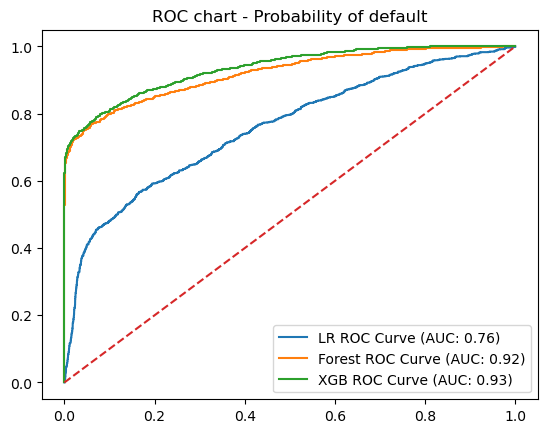

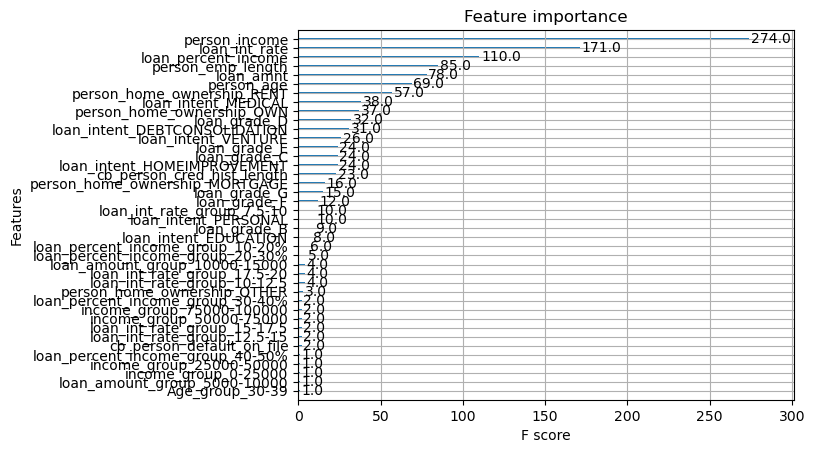

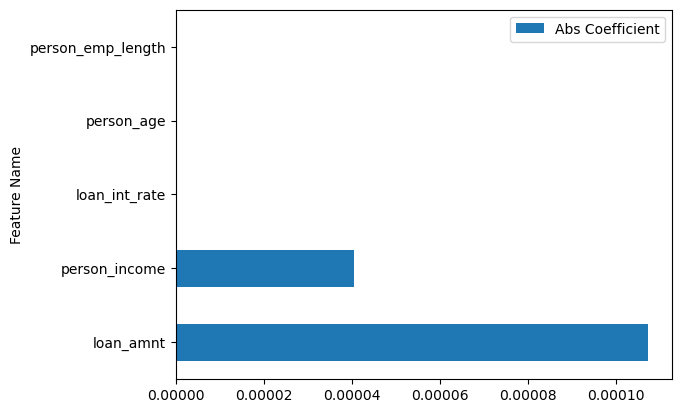

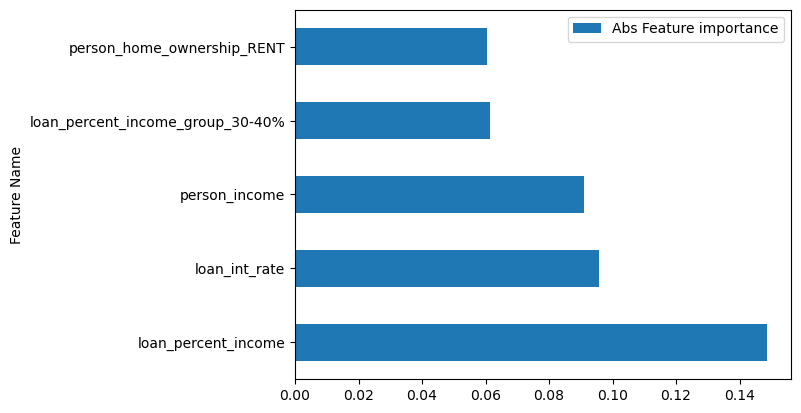

In [7]:
logistic_preds_df = pd.DataFrame(logistic_preds[:,1], columns = ['lr_prob_default'])
logistic_preds_df['lr_pred_status'] = logistic_preds_df.lr_prob_default.apply(lambda x: 1 if x > 0.26 else 0)

forest_preds_df = pd.DataFrame(forest_preds[:,1], columns = ['forest_prob_default'])
forest_preds_df['forest_pred_status'] = forest_preds_df.forest_prob_default.apply(lambda x: 1 if x > 0.167 else 0)

    
xgboost_preds_df = pd.DataFrame(xgboost_preds[:,1], columns = ['xgb_prob_default'])
xgboost_preds_df['xgb_pred_status'] = xgboost_preds_df.xgb_prob_default.apply(lambda x: 1 if x > 0.139 else 0)
roc_auc_plot()

### Undersampling strategy
#### undersampling strategy: Creating a training dataset which contains as many default as non-default.

0    4957
1    4957
Name: loan_status, dtype: int64


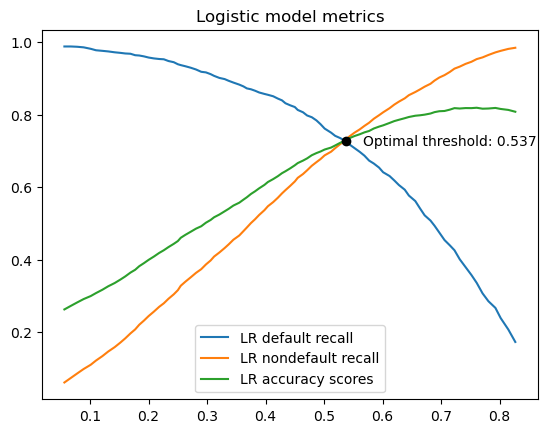

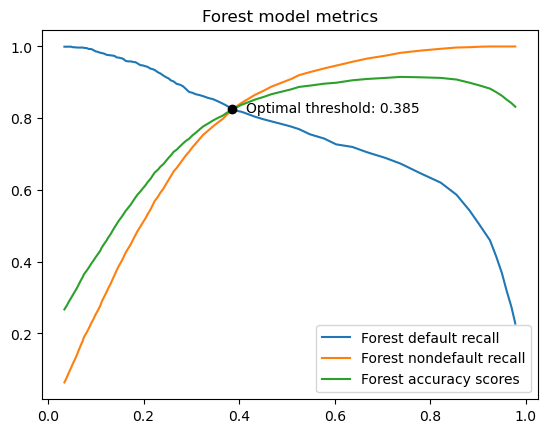

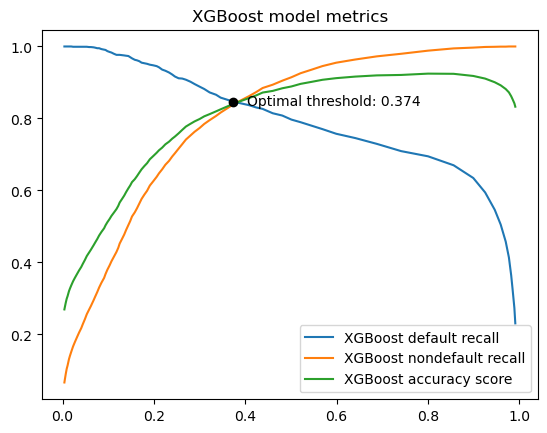

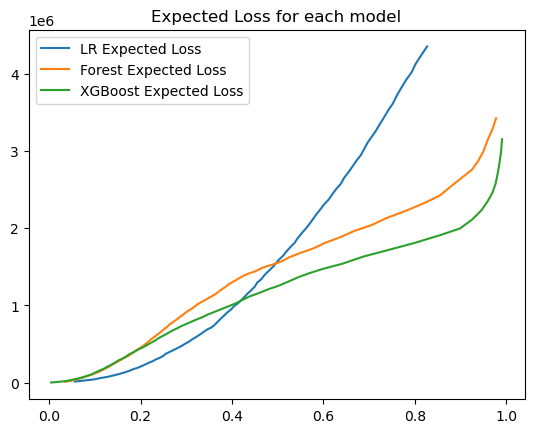

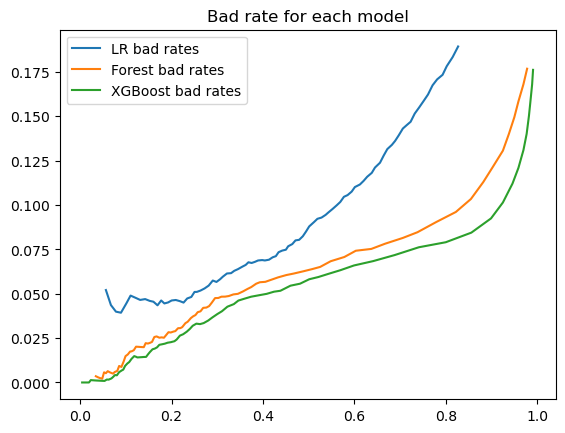

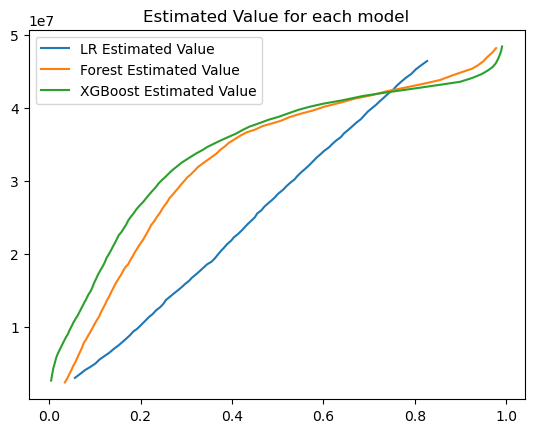

Logistic expected loss at the optimal threshold: 1811396.52
Forest expected loss at the optimal threshold: 1237786.73
XGBoost expected loss at the optimal threshold: 946060.04
Logistic estimated value at the optimal threshold: 30247303.48
Forest estimated value at the optimal threshold: 34785613.27
XGBoost estimated value at the optimal threshold: 35530814.96


In [8]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults =  X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

X_train = X_y_train_under.drop(['loan_status'], axis=1)
y_train = X_y_train_under['loan_status']

logistic.fit(X_train, y_train)
forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

logistic_preds = logistic.predict_proba(X_test)
forest_preds = forest.predict_proba(X_test)
xgboost_preds = xgboost.predict_proba(X_test)

accept_rate()

              precision    recall  f1-score   support

 Non Default       0.91      0.69      0.79      4481
     Default       0.41      0.76      0.53      1245

    accuracy                           0.71      5726
   macro avg       0.66      0.73      0.66      5726
weighted avg       0.80      0.71      0.73      5726

[[3102 1379]
 [ 301  944]]
              precision    recall  f1-score   support

 Non Default       0.94      0.85      0.89      4481
     Default       0.59      0.82      0.69      1245

    accuracy                           0.84      5726
   macro avg       0.77      0.83      0.79      5726
weighted avg       0.87      0.84      0.85      5726

[[3788  693]
 [ 229 1016]]
              precision    recall  f1-score   support

 Non Default       0.95      0.84      0.89      4481
     Default       0.60      0.85      0.70      1245

    accuracy                           0.84      5726
   macro avg       0.78      0.84      0.80      5726
weighted avg       0

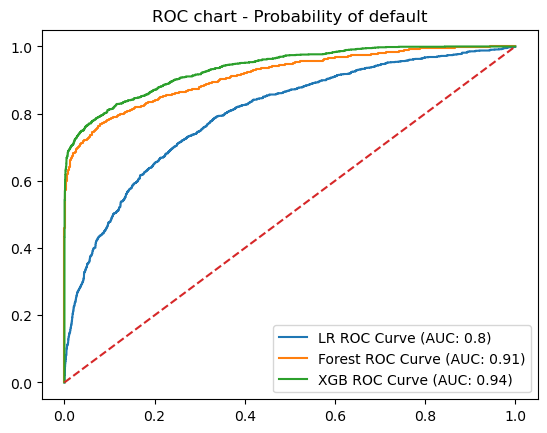

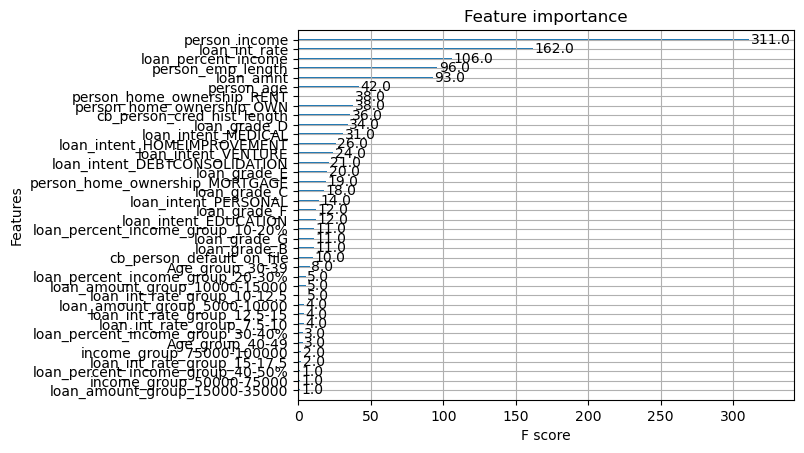

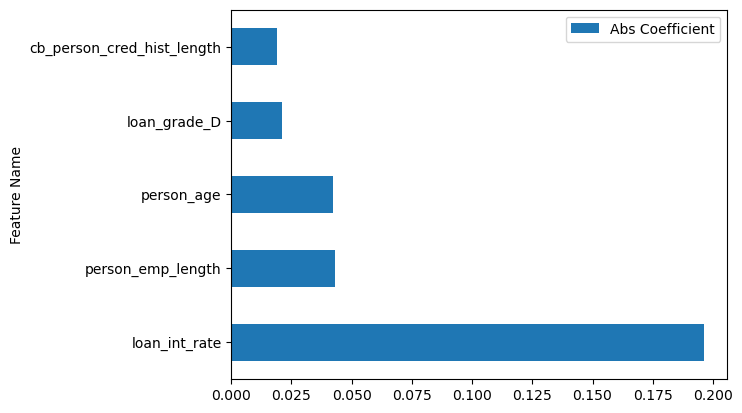

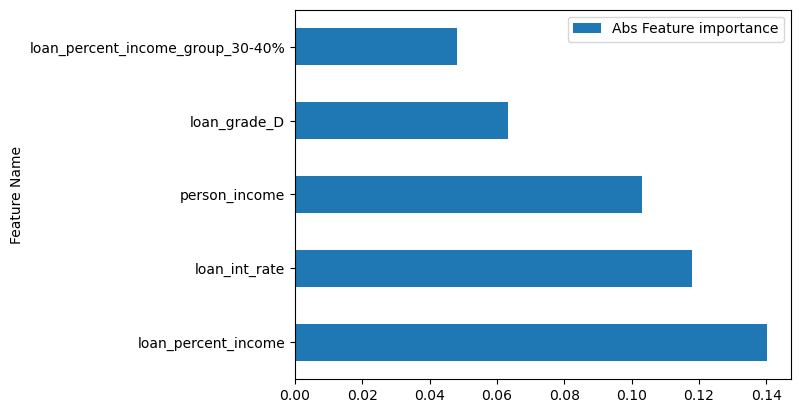

In [9]:
logistic_preds_df = pd.DataFrame(logistic_preds[:,1], columns = ['lr_prob_default'])
logistic_preds_df['lr_pred_status'] = logistic_preds_df.lr_prob_default.apply(lambda x: 1 if x > 0.506 else 0)

forest_preds_df = pd.DataFrame(forest_preds[:,1], columns = ['forest_prob_default'])
forest_preds_df['forest_pred_status'] = forest_preds_df.forest_prob_default.apply(lambda x: 1 if x > 0.407 else 0)

    
xgboost_preds_df = pd.DataFrame(xgboost_preds[:,1], columns = ['xgb_prob_default'])
xgboost_preds_df['xgb_pred_status'] = xgboost_preds_df.xgb_prob_default.apply(lambda x: 1 if x > 0.382 else 0)
roc_auc_plot()

#### The best models are the Gradient boosted models (GradientBoostingClassifier; XGBClassifier) with an accuracy of ~90%.

#### The affects of undersampling strategy
- The accuracy and recall parameters of the LogisticRegression model get better. (0.68 -> 0.73)
- The features importance of the LogisticRegression model changed. (Higher coef values and more feature are important)
- The "optimal thresholds" values get higher as well as the expected losses for every model.